In [11]:
import pandas as pd
import numpy as np
results = pd.read_csv('results_all_prop.csv')

In [14]:
results_unique = results.drop_duplicates(subset=['Instance Number', 'Proposal'])

In [18]:
len(results), len(results_unique)

(5025, 3010)

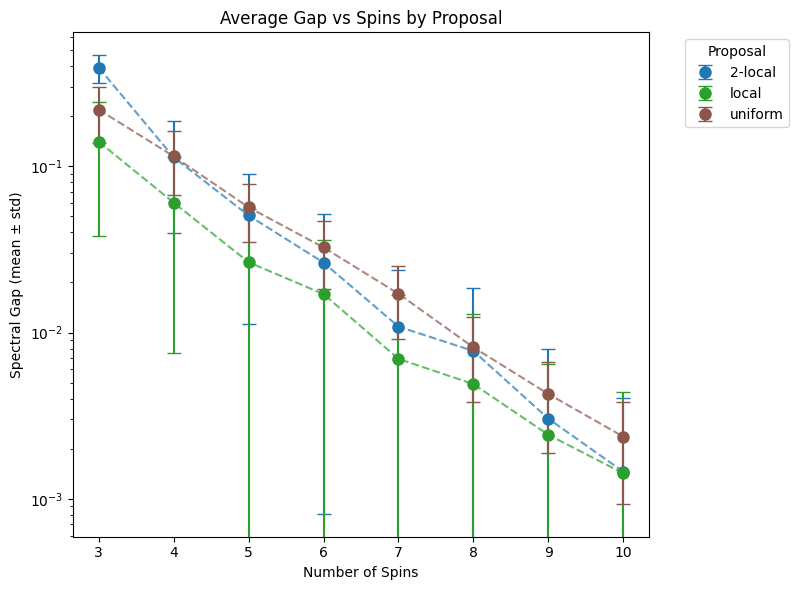

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# Ensure 'Spins' and 'Gap' columns are numeric
results['Spins'] = pd.to_numeric(results['Spins'], errors='coerce')
results['Gap'] = pd.to_numeric(results['Gap'], errors='coerce')

# Group by Proposal and Spins, calculate mean and std of Gap
grouped = results_unique.groupby(['Proposal', 'Spins']).agg({'Gap': ['mean', 'std']}).reset_index()
grouped.columns = ['Proposal', 'Spins', 'Gap_mean', 'Gap_std']

# Get unique proposals and assign a color to each
proposals = grouped['Proposal'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(proposals)))
plt.figure(figsize=(8,6))
for i, prop in [(0,'2-local'), (1,'local'), (2,'uniform')]: #enumerate(proposals):
    mask = grouped['Proposal'] == prop
    # Sort by Spins for line plot
    prop_data = grouped.loc[mask].sort_values('Spins')
    # Error bars
    plt.errorbar(prop_data['Spins'], prop_data['Gap_mean'], yerr=prop_data['Gap_std'], fmt='o', label=prop, color=colors[i], capsize=5, markersize=8)
    # Dashed line connecting points
    plt.plot(prop_data['Spins'], prop_data['Gap_mean'], linestyle='--', color=colors[i], alpha=0.7)
plt.title('Average Gap vs Spins by Proposal')
plt.xlabel('Number of Spins')
plt.ylabel('Spectral Gap (mean ± std)')
plt.legend(title='Proposal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.semilogy()
plt.show()